In [3]:
x <- "Hello World"
x

[1] "Hello World"

In [4]:
library(R2jags)
library(MCMCvis)
library(coda)
library(lattice)


In [5]:
jags.mod.coin <- function(){
Y ~ dbin(0.5,10) # our data model
P8 <- ifelse(Y>7,1,0) # the probability of interest
}

In [6]:
jags.mod.fit.coin <- jags(data = list(), model.file = jags.mod.coin,
parameters.to.save = c('Y','P8'),n.chains=1,
DIC=FALSE, n.burnin=0,n.iter = 100)

module glm loaded

module dic loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model



In [7]:
print(jags.mod.fit.coin)


Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model138033c148e9.txt", fit using jags,
 1 chains, each with 100 iterations (first 0 discarded)
 n.sims = 100 iterations saved
   mu.vect sd.vect 2.5% 25% 50% 75% 97.5%
P8    0.04   0.197    0   0   0   0     1
Y     4.99   1.599    2   4   5   6     8


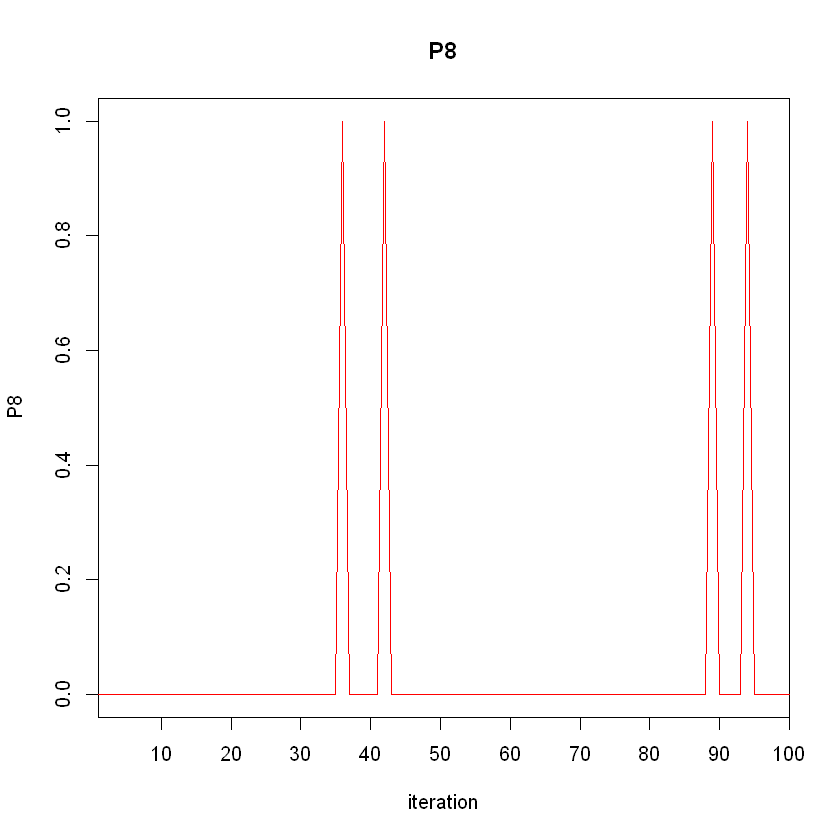

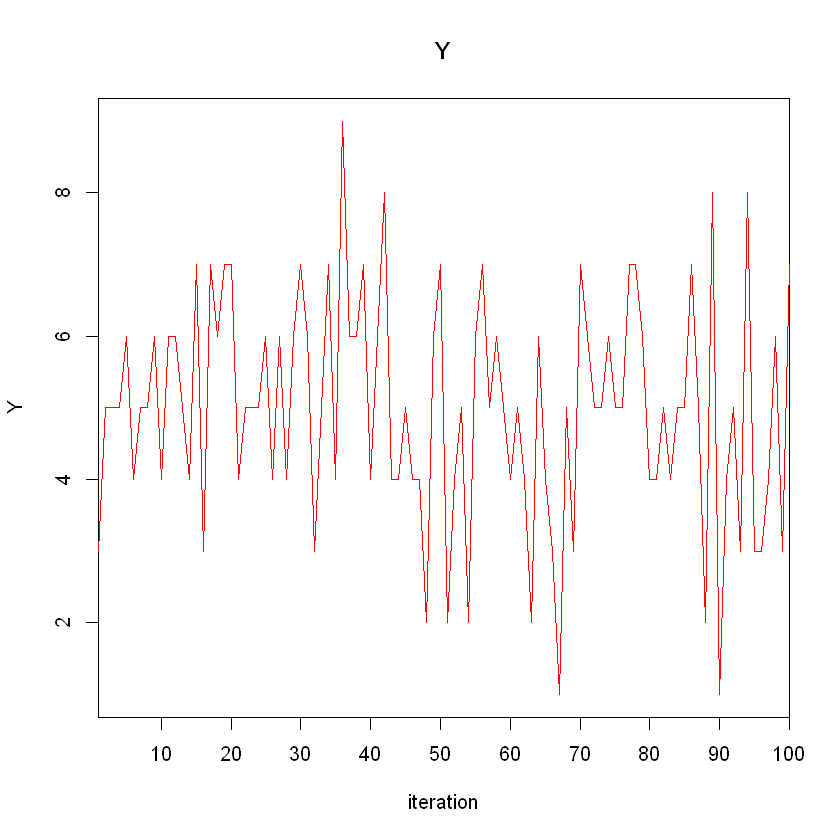

In [8]:
traceplot(jags.mod.fit.coin)

In [9]:
# convert into MCMC object
jagsfit.mcmc.coin <- as.mcmc(jags.mod.fit.coin)
# get numerical summary
summary(jagsfit.mcmc.coin)


Iterations = 1:100
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 100 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

   Mean     SD Naive SE Time-series SE
P8 0.04 0.1969  0.01969        0.01969
Y  4.99 1.5986  0.15986        0.15986

2. Quantiles for each variable:

   2.5% 25% 50% 75% 97.5%
P8    0   0   0   0     1
Y     2   4   5   6     8


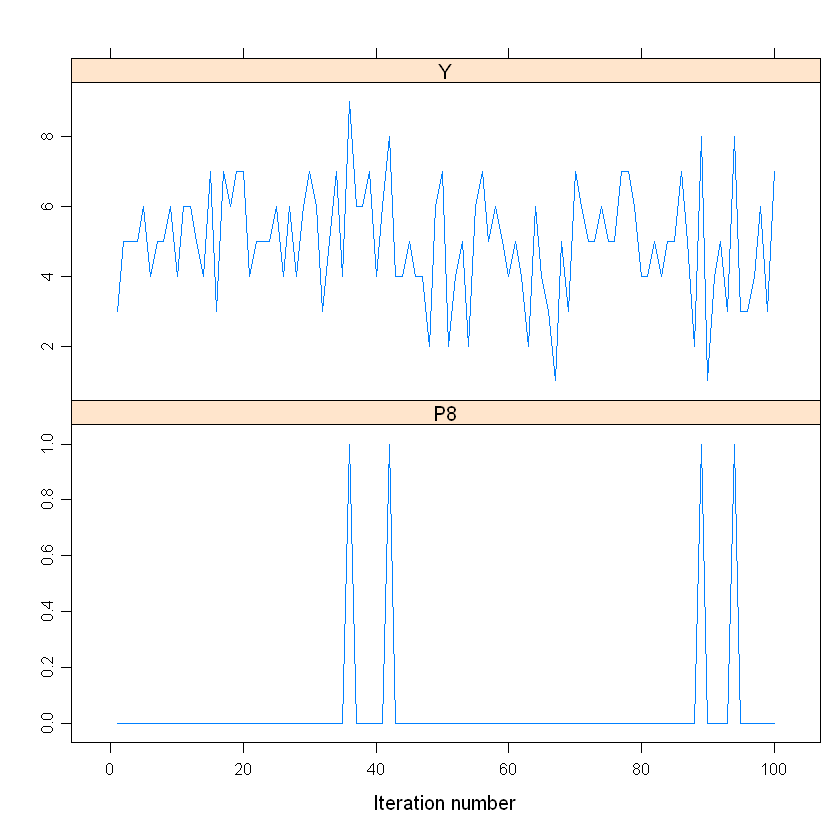

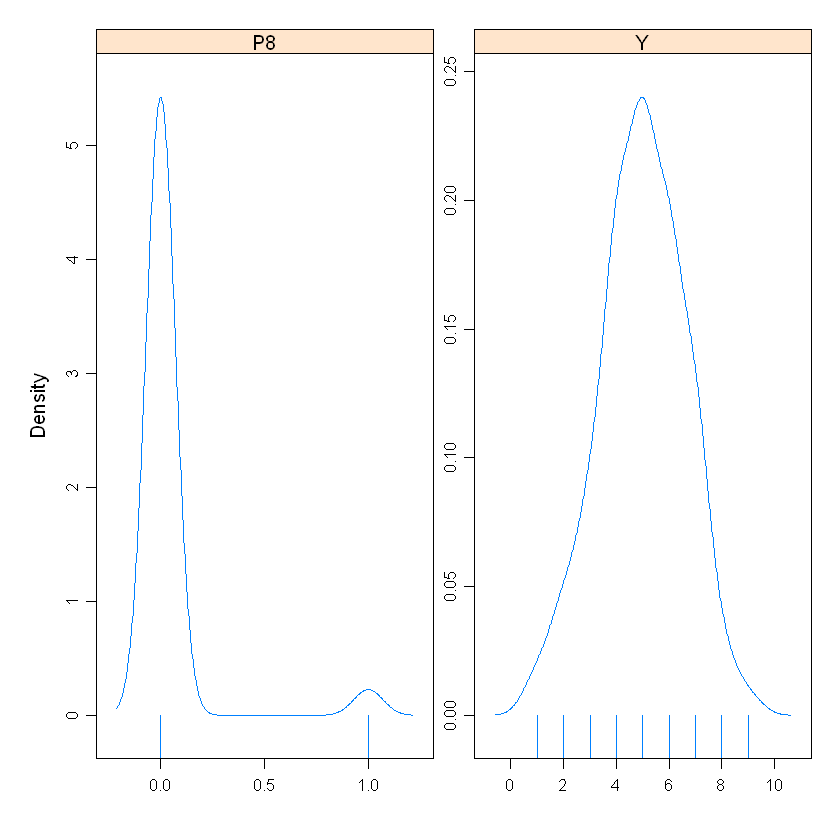

In [10]:
# get traceplots
xyplot(jagsfit.mcmc.coin)
# get density estimate
densityplot(jagsfit.mcmc.coin)

In [11]:
# Drug Trial Code
jags.mod.drug <- function(){
    prior ~ dbeta(9.2,13.8)
    y ~ dbin(prior,20)
    P.crit <- ifelse(y>=15,1,0)
} 
jags.mod.fit.drug <- jags(data = list(),n.iter = 10000,DIC=FALSE,parameters.to.save = c('prior','y','P.crit'),
model.file = jags.mod.drug,n.chains=1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 10

Initializing model



In [12]:
# Drug Trial Code
jags.mod.drug_ques <- function(){
    prior ~ dunif(0,1)
    y ~ dbin(prior,20)
    P.crit <- ifelse(y>=15,1,0)
} 
jags.mod.fit.drug_ques <- jags(data = list(),n.iter = 10000,DIC=FALSE,parameters.to.save = c('prior','y','P.crit'),
model.file = jags.mod.drug_ques,n.chains=1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 8

Initializing model



In [13]:
print(jags.mod.fit.drug_ques) # numerical summaries

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model1380155d7b56.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
       mu.vect sd.vect  2.5%   25%    50%    75%  97.5%
P.crit   0.294   0.456 0.000 0.000  0.000  1.000  1.000
prior    0.499   0.290 0.023 0.251  0.495  0.752  0.976
y       10.070   6.062 0.000 5.000 10.000 15.000 20.000


Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model13804f8e3406.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
       mu.vect sd.vect  2.5%   25%   50%    75%  97.5%
P.crit   0.011   0.104 0.000 0.000 0.000  0.000  0.000
prior    0.399   0.097 0.211 0.328 0.394  0.466  0.588
y        8.000   2.971 2.000 6.000 8.000 10.000 14.000


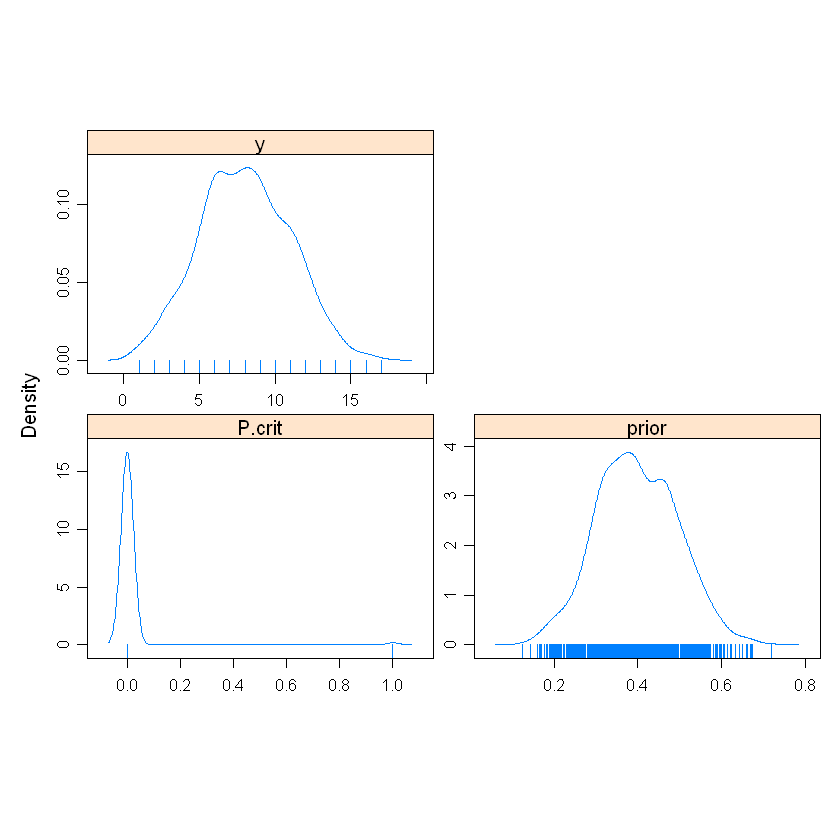

In [14]:
# Look at the outcome
print(jags.mod.fit.drug) # numerical summaries
# traceplots
# traceplot(jags.mod.fit)
# convert into MCMC object for more visualisation tools
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [24]:
# drug trial example 2
jags.mod.drug2 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}

a=9.2 # first parameter of the prior
b=13.8 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug2 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug2 <- jags(data = jags.data.drug2,n.iter=10000,parameters.to.save = c('likelihood','likelihood.pred','prior','P.crit'),
DIC=FALSE,model.file = jags.mod.drug2,n.chains = 1)

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model



Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model1380307960dd.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
                mu.vect sd.vect  2.5%    25%    50%    75% 97.5%
P.crit            0.048   0.214 0.000  0.000  0.000  0.000  1.00
likelihood        7.973   2.880 3.000  6.000  8.000 10.000 13.00
likelihood.pred  15.785   4.929 7.000 12.000 15.000 19.000 26.00
prior             0.398   0.100 0.224  0.324  0.395  0.464  0.61


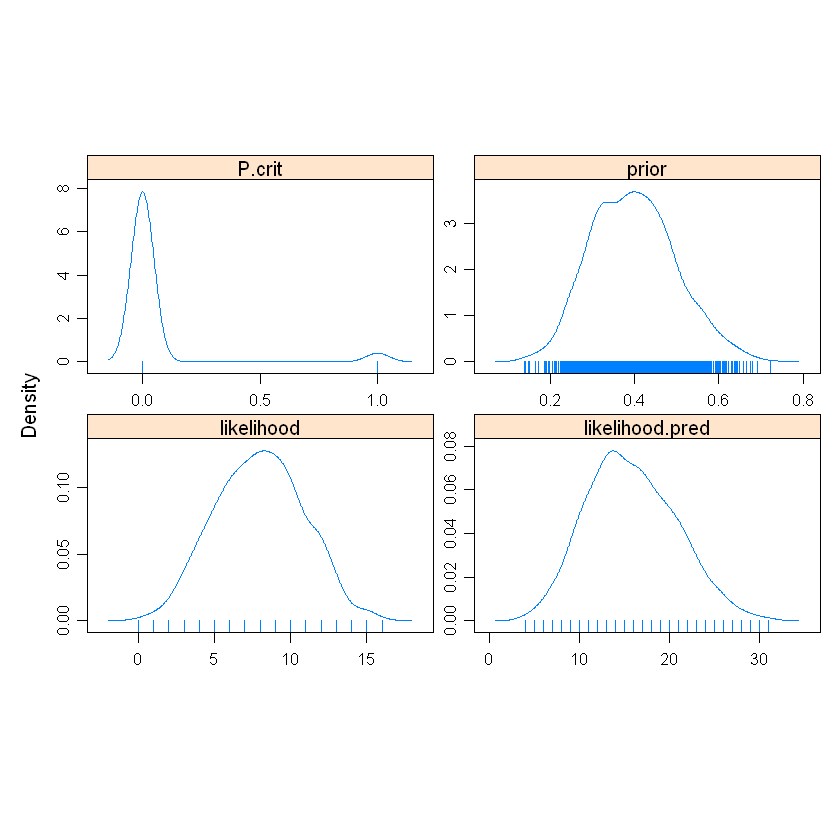

In [25]:
# Look at the outcome
print(jags.mod.fit.drug2) # numerical summaries
# traceplots
# traceplot(jags.mod.fit)
# convert into MCMC object for more visualisation tools
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug2)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model138034c25c3f.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
                mu.vect sd.vect  2.5%   25%    50%    75%  97.5%
P.crit            0.390   0.488 0.000 0.000  0.000  1.000  1.000
likelihood        9.851   6.094 0.000 5.000 10.000 15.000 20.000
likelihood.pred  19.727  12.042 1.000 9.000 19.000 30.000 39.000
prior             0.495   0.293 0.028 0.232  0.488  0.745  0.974


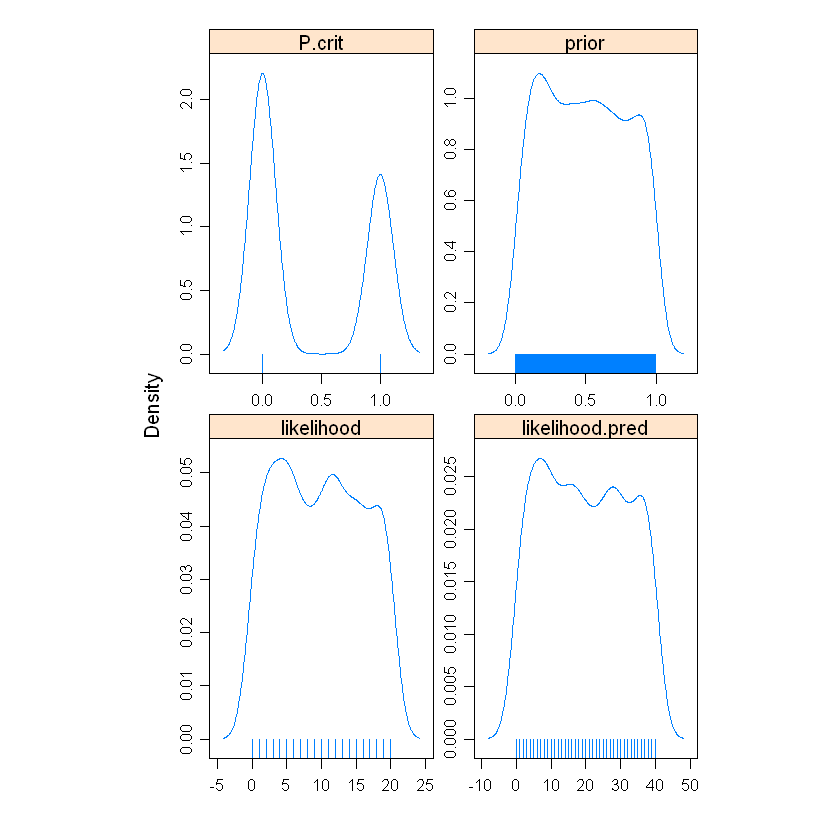

In [22]:
# drug trial example 2
jags.mod.drug3 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}

a=1 # first parameter of the prior
b=1 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug3 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug3 <- jags(data = jags.data.drug2,n.iter=10000,parameters.to.save = c('likelihood','likelihood.pred','prior','P.crit'),
DIC=FALSE,model.file = jags.mod.drug3,n.chains = 1)


print(jags.mod.fit.drug3) # numerical summaries
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug3)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [23]:
jags.mod.drug2 <- function(){
    prior ~ dbeta(a,b)
    likelihood ~ dbin(prior,n)
    likelihood.pred ~ dbin(prior,m)
    P.crit <- ifelse(likelihood.pred>=ncrit,1,0)
}
# Parameters we want to monitor
jags.param.drug2 <- c('prior','likelihood.pred','P.crit')
# Specify initial values
jags.inits1 <- list('prior' = 0.7, 'likelihood.pred' = 20)
jags.inits2 <- list('prior' = 0.5, 'likelihood.pred' = 28)
jags.inits.drug2 <- list(jags.inits1,jags.inits2)

a=9.2 # first parameter of the prior
b=13.8 # second parameter of the prior
r=15 # resoinse (our data)
n=20 # patient number
m=40 # future patient number
ncrit=25 # threshold for future trial
jags.data.drug2 <- list('a','b','r','n','m','ncrit')


jags.mod.fit.drug2 <- jags(data = jags.data.drug2, inits = jags.inits.drug2,
parameters.to.save = jags.param.drug2, n.chains = 2,DIC=FALSE,
n.iter = 10000, model.file = jags.mod.drug2)


Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
"Unused variable "r" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 3
   Total graph size: 12

Initializing model



In [18]:
print(jags.mod.fit.drug2)

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model13802ef4e6.txt", fit using jags,
 2 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 2000 iterations saved
                mu.vect sd.vect  2.5%   25%    50%    75%  97.5%  Rhat n.eff
P.crit            0.045   0.207 0.000  0.00  0.000  0.000  1.000 1.004  2000
likelihood.pred  15.947   4.837 7.000 13.00 16.000 19.000 26.000 1.001  2000
prior             0.399   0.097 0.225  0.33  0.396  0.464  0.594 1.001  2000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor (at convergence, Rhat=1).


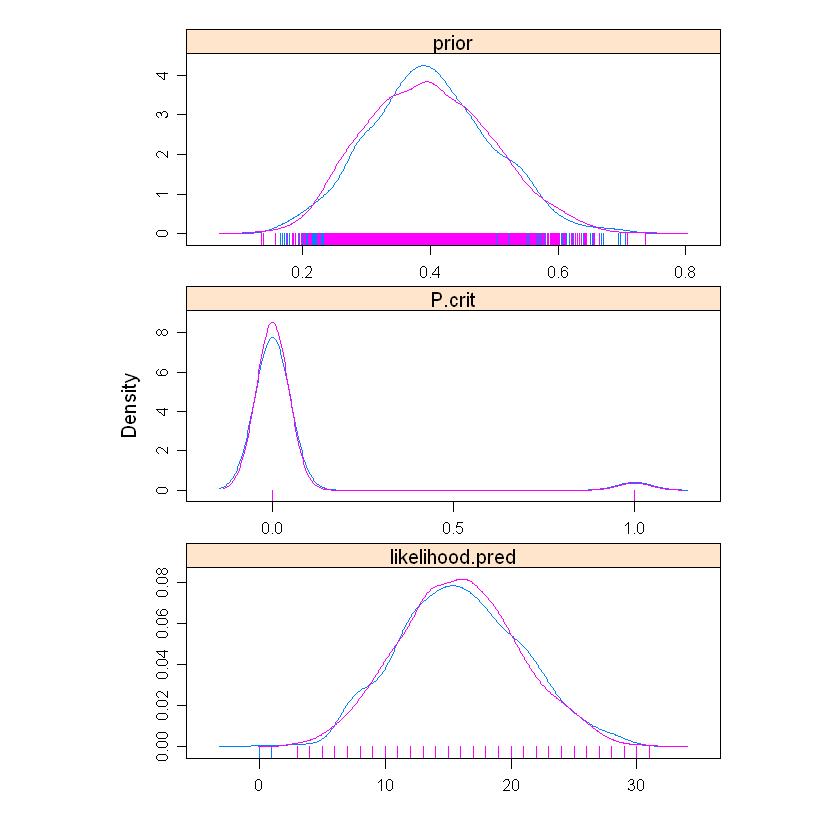

In [19]:
jagsfit.mcmc.drug <- as.mcmc(jags.mod.fit.drug2)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.drug)

In [45]:
# problem on THM
jags.mod.thm <- function(){
    prior ~ dnorm(120,1/100)
    for(i in 1:N){
        likelihood[i] ~ dnorm(prior,1/25)
    }
    likelihood.pred ~ dnorm(prior,1/25)
    P.crit_1 = ifelse(likelihood>130,1,0)
    P.crit = ifelse(likelihood.pred>145,1,0)
}
N = 2
likelihood  = c(130,130)
jags.mod.data = list('N','likelihood')
jags.mod.fit.thm <- jags(data=jags.mod.data,parameters.to.save = c('prior','likelihood.pred','P.crit','P.crit_1'),
n.iter = 10000,model.file=jags.mod.thm)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2
   Unobserved stochastic nodes: 2
   Total graph size: 19

Initializing model



Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model13806cb359ed.txt", fit using jags,
 3 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 3000 iterations saved
                mu.vect sd.vect    2.5%     25%     50%     75%   97.5%  Rhat
P.crit            0.004   0.060   0.000   0.000   0.000   0.000   0.000 1.027
P.crit_1[1]       0.000   0.000   0.000   0.000   0.000   0.000   0.000 1.000
P.crit_1[2]       0.000   0.000   0.000   0.000   0.000   0.000   0.000 1.000
likelihood.pred 128.833   5.970 117.137 124.826 128.804 132.688 140.747 1.002
prior           128.886   3.356 122.264 126.570 128.903 131.152 135.581 1.001
deviance         11.113   1.399  10.115  10.213  10.574  11.428  15.027 1.001
                n.eff
P.crit           3000
P.crit_1[1]         1
P.crit_1[2]         1
likelihood.pred  1300
prior            3000
deviance         3000

For each parameter, n.eff is a crude measure of effective sample size,
and Rhat is 

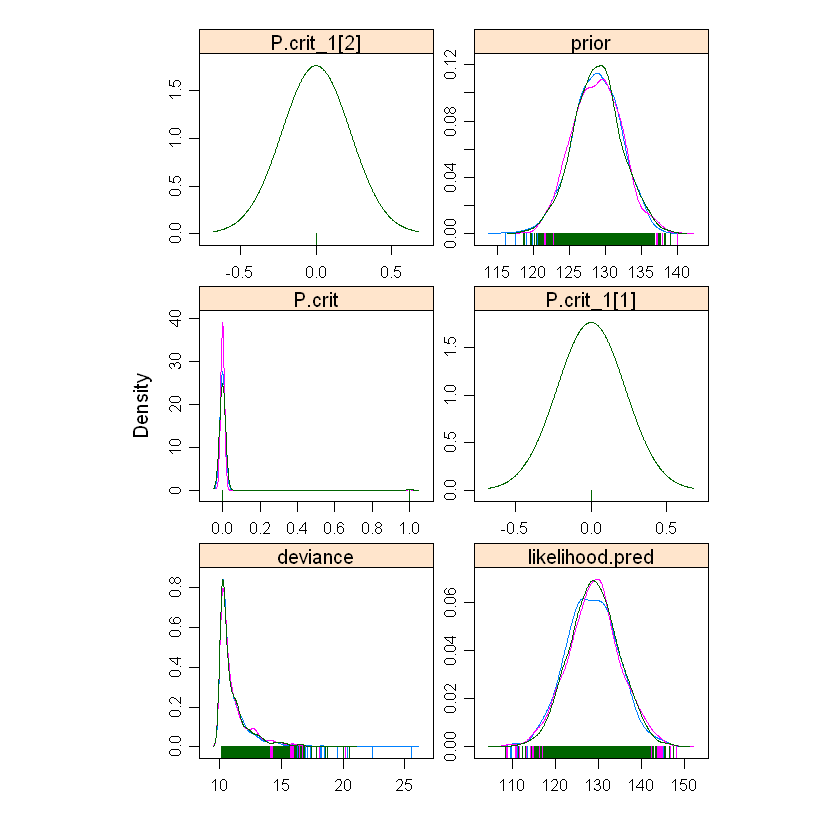

In [46]:
print(jags.mod.fit.thm)
jagsfit.mcmc.thm <- as.mcmc(jags.mod.fit.thm)
densityplot(jagsfit.mcmc.thm)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 4

Initializing model

Inference for Bugs model at "C:/Users/hp/AppData/Local/Temp/RtmpwPFc3f/model138020954c84.txt", fit using jags,
 1 chains, each with 10000 iterations (first 5000 discarded), n.thin = 5
 n.sims = 1000 iterations saved
            mu.vect  sd.vect   2.5%      25%      50%      75%    97.5%
likelihood 47433.92 69158.38 27.950 4315.250 20454.50 61921.25 240012.9
prior      47417.75 69128.00 28.057 4318.815 20524.03 61948.93 240537.7


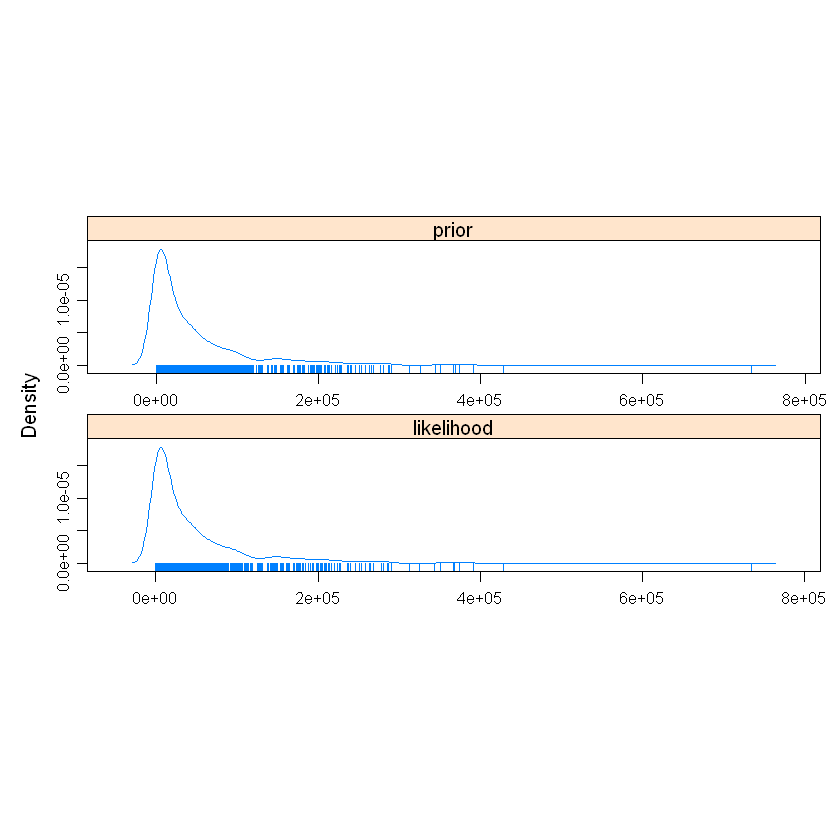

In [20]:
# question on flying bomb
jags.mod.flyingbomb <- function(){
    prior ~ dgamma(0.5,0.00001)
    likelihood ~ dpois(prior)
}
jags.mod.fit.flyingbomb <- jags(data=list(),n.iter=10000,parameters.to.save = c('prior','likelihood'),
model.file=jags.mod.flyingbomb,n.chains = 1,DIC=FALSE)

print(jags.mod.fit.flyingbomb)
jagsfit.mcmc.flyingbomb <- as.mcmc(jags.mod.fit.flyingbomb)
# get density plots of the monitored nodes
densityplot(jagsfit.mcmc.flyingbomb)